# Lending Club Loan Data Analysis

Problem Statement:  


For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


A quick look at what the columns in the dataset represent:

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import numpy as np
import tensorflow as tf
from tensorflow import keras

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Load the data

In [2]:
dfLoan = pd.read_csv("loan_data.csv")

In [3]:
dfLoan.shape

(9578, 14)

In [4]:
dfLoan.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [5]:
dfLoan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
dfLoan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
dfLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Exploratory data analysis

Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify whether or not a loan will be default using the historical data.



## Checking the proportion of each target class?

In [8]:
def percent(num1, num2):
    percentage = ((num1 / num2 * 100))
    return percentage

In [9]:
not_paid, paid = dfLoan['not.fully.paid'].value_counts()

print(f'Not Paid {not_paid}')
print(f'Paid {paid}')
print(f'Loan Paid proportion {round(percent(paid, paid + not_paid), 2)}%')

Not Paid 8045
Paid 1533
Loan Paid proportion 16.01%


We have an imbalanced dataset on our hands. Let’s look at a graphical representation of the imbalance:

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

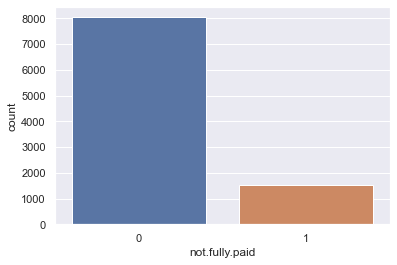

In [10]:
sns.countplot(x='not.fully.paid',data=dfLoan)

You got the visual proof right there. We have an imbalanced class issue here. There are way more samples of fully paid borrowers versus not fully paid borrowers. This could be an issue when we make our prediction. 

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


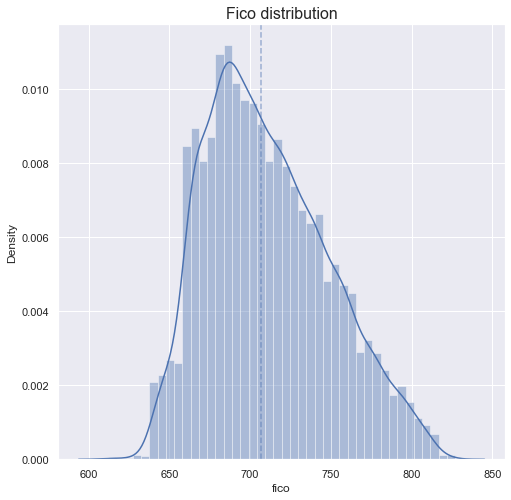

In [11]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 8))

sns.distplot(dfLoan["fico"], ax=ax1)

ax1.set_title("Fico distribution", fontsize=16);

ax1.axvline(x=dfLoan["fico"].median(), linestyle="--", alpha=0.5)

In [12]:
#fig = px.histogram(x=dfLoan['fico'], nbins=50, histnorm='density')
#fig.update_layout(title='Fico distribution:',xaxis_title='Fico Score', yaxis_title='Count')

Insight: Distribution is left skewed. The median is 707 and mean is 710.84 which the slightly left of the peak.
The negative skewness of the distribution indicates that an Lending Club may expect frequent small gains and a few large losses.    
    

# Analysis on Fico - Loan Paid

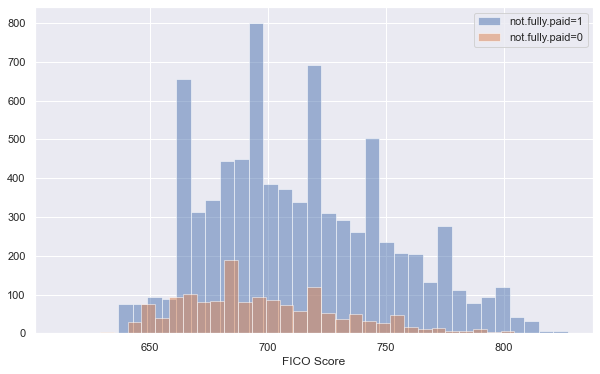

In [13]:
#fig = px.histogram(dfLoan, x="fico", color="not.fully.paid", hover_data=dfLoan.columns,
                   #title ="Analysis on Fico - Loan Paid",                  
                   #nbins=50)
#fig.show()

plt.figure(figsize=(10,6))

dfLoan[dfLoan['not.fully.paid']==0]['fico'].hist(bins=35,alpha=0.5,label='not.fully.paid=1')
dfLoan[dfLoan['not.fully.paid']==1]['fico'].hist(bins=35,alpha=0.5,label='not.fully.paid=0')
plt.xlabel('FICO Score')
plt.legend()

Insight: There is no much difference between the distribution of FICO scores of those that have fully paid their balances and those that have not paid.

# Analysis on Fico - Credit Policy

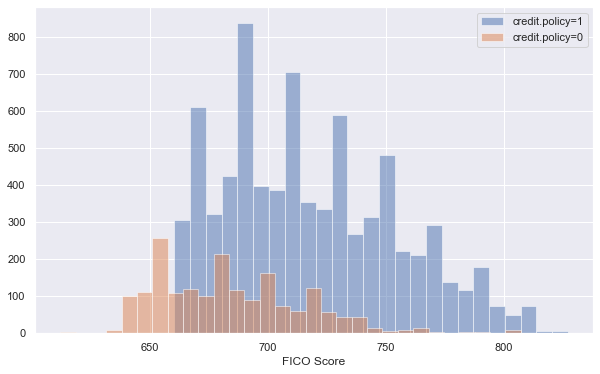

In [15]:
#fig = px.histogram(dfLoan, x="fico", color="credit.policy", hover_data=dfLoan.columns,
                 #  title ="Analysis on Fico - Credit Policy",                   
                 #  nbins=50)
#fig.show()

plt.figure(figsize=(10,6))
dfLoan[dfLoan['credit.policy']==1]['fico'].hist(bins=30,alpha=0.5,label='credit.policy=1')
dfLoan[dfLoan['credit.policy']==0]['fico'].hist(bins=30,alpha=0.5,label='credit.policy=0')
plt.xlabel('FICO Score')
plt.legend()

Insight: Consumers with higher FICO scores tend to meet the credit underwriting criteria.

# Trend : FICO score and interest rate with respect with Fully/Not Fully Paid

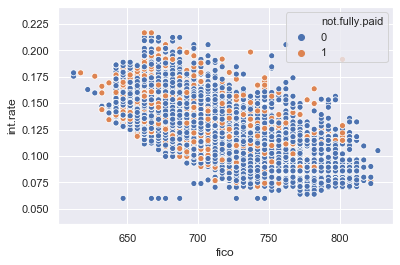

In [15]:
sns.scatterplot(x = "fico", y = "int.rate", data = dfLoan[["fico", "int.rate", "not.fully.paid"]],
                hue = "not.fully.paid");

Insight : Lower FICO scores tend to be correlated with higher interest rates and vice versa.

# Trend  : Loan Paid V/S Credit Policy.

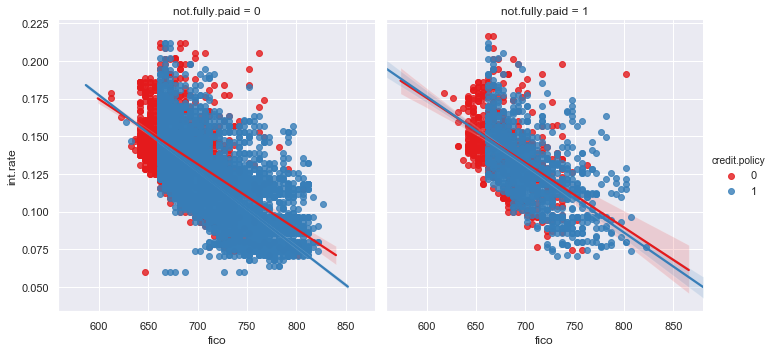

In [16]:
sns.lmplot(x='fico',y='int.rate',data=dfLoan,col='not.fully.paid',hue='credit.policy',palette='Set1')

Insight: The trend of FICO score and interest rate is similar as we expect for those that fully paid balances versus those that did not paid.

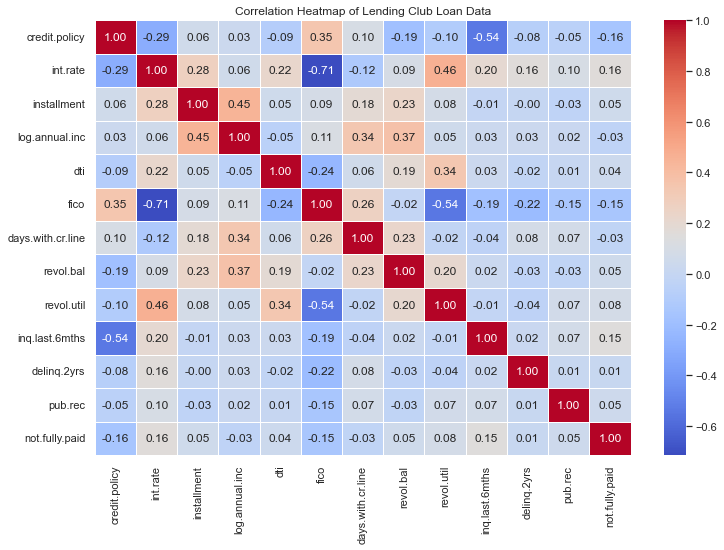

In [17]:
# Calculate the correlation matrix
corr_matrix = dfLoan.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Lending Club Loan Data')
plt.show()


# Data preprocessing

Let’s check how many rows/columns contain missing data:

In [19]:
row_count = dfLoan.shape[0]
for c in dfLoan.columns:
  m_count = dfLoan[dfLoan[c] == -1][c].count()
  if m_count > 0:
    print(f'{c} - {m_count} ({round(percentage(m_count, row_count), 3)}%) rows missing')
  else:
    print(f'{c} ''contain no missing data ')    
    

credit.policy contain no missing data 
purpose contain no missing data 
int.rate contain no missing data 
installment contain no missing data 
log.annual.inc contain no missing data 
dti contain no missing data 
fico contain no missing data 
days.with.cr.line contain no missing data 
revol.bal contain no missing data 
revol.util contain no missing data 
inq.last.6mths contain no missing data 
delinq.2yrs contain no missing data 
pub.rec contain no missing data 
not.fully.paid contain no missing data 


Now that we don’t have more missing values. We need to transform categorical values into numerical values

# Categorical features

Pandas get_dummies() uses one-hot encoding to represent categorical features. 


In [20]:
cat_columns = ['purpose']

In [21]:
final_data = pd.get_dummies(dfLoan,columns=cat_columns,drop_first=True)
#dfLoan = pd.get_dummies(dfLoan, columns=cat_columns)

In [22]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [23]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

# Building the model

We’ll start by splitting the data into train and test datasets:

In [24]:
from sklearn.model_selection import train_test_split


X =final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=RANDOM_SEED)

Our binary classification model is a Neural Network with batch normalization and dropout layers:

In [25]:
def build_model(train_data, metrics=["accuracy"]):
  model = keras.Sequential([
                            keras.layers.Dense(
                            units=36,
                            activation='relu',
                            input_shape=(train_data.shape[-1],)
                            ),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(units=1, activation='sigmoid'),
  ])
  model.compile(
                optimizer=keras.optimizers.Adam(lr=0.001),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)
  return model

In [26]:
BATCH_SIZE = 100

model = build_model(X_train)

history = model.fit(
                    X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=20,
                    validation_split=0.05,
                    shuffle=True,
                    verbose=0
                    )

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                684       
                                                                 
 batch_normalization (Batch  (None, 36)                144       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 37        
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 793 (3.10 KB)
Non-trainable params: 72 (288.00 Byte)
_________________________________________________________________


In [28]:
def plot_accuracy(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
            label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
            label = 'Val Accuracy')
  plt.ylim((0, 1))
  plt.legend()
  plt.show()

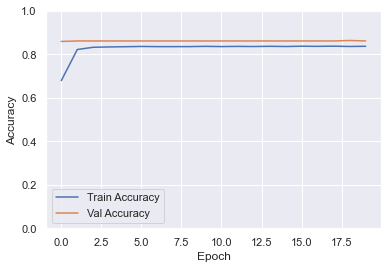

In [29]:
plot_accuracy(history)

In [30]:
model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

5/5 [==============================] - 0s 4ms/step - loss: 0.4049 - accuracy: 0.8580


[0.4049014151096344, 0.8580375909805298]

# Radom Forest Classifier

In [37]:
# Resample training set using SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=RANDOM_SEED)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_train_res.value_counts()}")


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Original dataset shape: 0    7635
1    1464
Name: not.fully.paid, dtype: int64
Resampled dataset shape: 0    7635
1    7635
Name: not.fully.paid, dtype: int64


In [43]:
# Reshaping the data to 3D format: [samples, timesteps, features]
# Since this is a tabular dataset, each sample will have one timestep
X_train_res_3d = np.expand_dims(X_train_res, axis=1)
X_test_3d = np.expand_dims(X_test, axis=1)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
def build_bidirectional_lstm(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=input_shape))
    model.add(Dropout(0.3))  # Dropout to prevent overfitting
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape
input_shape = (X_train_res_3d.shape[1], X_train_res_3d.shape[2])

# Build the model
model = build_bidirectional_lstm(input_shape)

# Model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 128)               42496     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46657 (182.25 KB)
Trainable params: 46657 (182.25 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [47]:
# Set batch size and epochs
BATCH_SIZE = 64
EPOCHS = 20

# Train the model
history = model.fit(X_train_res_3d, y_train_res, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, shuffle=True)


Epoch 1/20
191/191 [==============================] - 10s 11ms/step - loss: 0.6767 - accuracy: 0.6041 - val_loss: 0.8763 - val_accuracy: 0.0052
Epoch 2/20
191/191 [==============================] - 1s 7ms/step - loss: 0.6639 - accuracy: 0.6232 - val_loss: 0.8724 - val_accuracy: 0.0052
Epoch 3/20
191/191 [==============================] - 1s 6ms/step - loss: 0.6619 - accuracy: 0.6245 - val_loss: 0.9200 - val_accuracy: 0.0072
Epoch 4/20
191/191 [==============================] - 1s 7ms/step - loss: 0.6611 - accuracy: 0.6257 - val_loss: 0.9273 - val_accuracy: 0.0052
Epoch 5/20
191/191 [==============================] - 1s 6ms/step - loss: 0.6611 - accuracy: 0.6256 - val_loss: 0.9911 - val_accuracy: 0.0069
Epoch 6/20
191/191 [==============================] - 1s 7ms/step - loss: 0.6606 - accuracy: 0.6261 - val_loss: 0.9286 - val_accuracy: 0.0065
Epoch 7/20
191/191 [==============================] - 1s 7ms/step - loss: 0.6619 - accuracy: 0.6266 - val_loss: 0.9330 - val_accuracy: 0.0069
Epoc

In [48]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_3d, y_test, batch_size=BATCH_SIZE)
print(f'Test Accuracy: {accuracy:.4f}')


8/8 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.8580
Test Accuracy: 0.8580


In [49]:
# Predictions
y_pred = (model.predict(X_test_3d) > 0.5).astype("int32")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


15/15 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       410
           1       1.00      0.01      0.03        69

    accuracy                           0.86       479
   macro avg       0.93      0.51      0.48       479
weighted avg       0.88      0.86      0.79       479

Confusion Matrix:
[[410   0]
 [ 68   1]]


# Conclusion :

Due to the imbalance of classes in the response variable, it may be critical to resample the response variable to balance the classes which could vastly improve the models.